# Deep Learning and Computer Vision
## Regularization, Data augmentation and transfer learning

The aim of this exercise is to code a CNN that provides the best results you can on a classification
task. The idea is to test the different tools studied during the lecture and to measure their impact on
the provided dataset.
This dataset is constituted by 10 categories of flowers.
It contains 800 color images: 600 (60 per category) are in the training set and 200 (20 per category)
in the validation set. The train/validation split is provided.
The images have different sizes, so it is required to resize them to 128x128.
For this exercise, you have to:
- Work only with images whose sizes are 128x128.
- Train your network only on the training set (not on the validation set).
- Cite the references of any code found online and be able to explain it.
You have to improve the performance of the provided network step by step.

You have to submit a report for this exercise (groups from 1 to 3 students).
The deadline is March 28th
 for the report.
Each time you have an idea to improve the results, you have to create a new section in your report
in which you:
- Give some details about your idea.
- Explain why do you think it could be good to test this idea.
- Provide the code for this idea.
- Provide the results.
At least, the next steps have to be explored (maybe not in this order):
- Your own architecture trained from scratch.
- Some regularization tools.
- Data augmentation.
- Fine tuning a pre-trained CNN.


In [1]:
import tensorflow as tf
from tensorflow import keras

Load the dataset

In [3]:
# Load the dataset
train_ds = keras.utils.image_dataset_from_directory(
    directory='data/Flowers/Train',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(128, 128))
validation_ds = keras.utils.image_dataset_from_directory(
    directory='data/Flowers/Test',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(128, 128))

Found 600 files belonging to 10 classes.
Found 200 files belonging to 10 classes.


In [13]:
class_names = train_ds.class_names
print(class_names)

['Fleurs0', 'Fleurs1', 'Fleurs2', 'Fleurs3', 'Fleurs4', 'Fleurs5', 'Fleurs6', 'Fleurs7', 'Fleurs8', 'Fleurs9']


Visualize some images from the dataset

(32, 128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


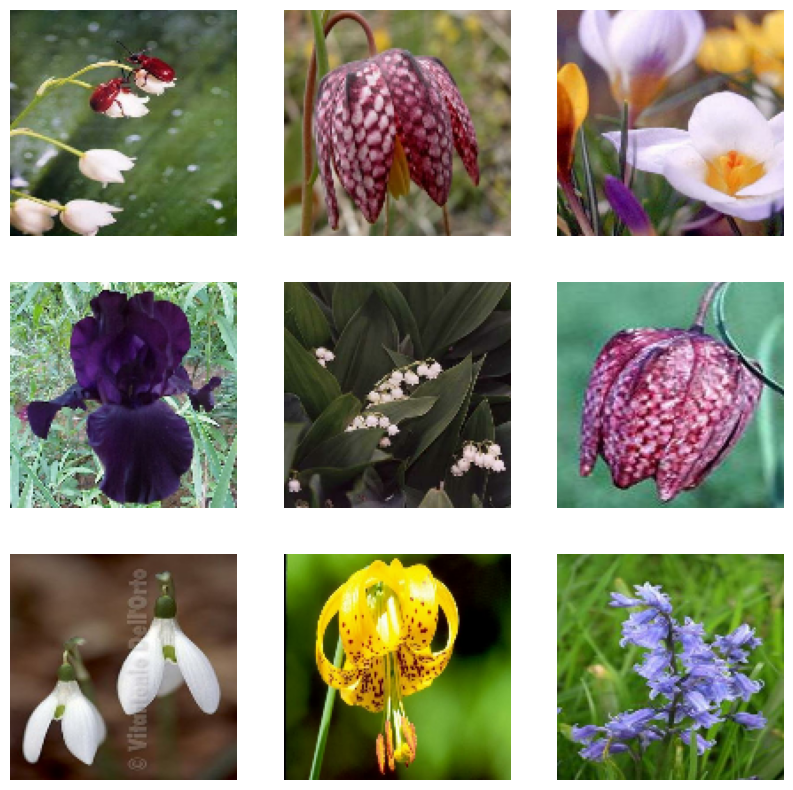

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  print(images.shape)
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")
    print(images[i].shape)

### Standardize the data
The RGB channel values are in the [0, 255] range. This is not ideal for a neural network; in general you should seek to make your input values small.
Here, you will standardize values to be in the [0, 1] range by using tf.keras.layers.Rescaling:

In [27]:
from keras import layers
import numpy as np

normalization_layer = layers.Rescaling(1./255)
# Normalized the train data 
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))

# Normalized the validation data 
normalized_validation_ds = validation_ds.map(lambda x, y: (normalization_layer(x), y))
image_validation_batch, labels_validation_batch = next(iter(normalized_validation_ds))

first_image = image_batch[0]

# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


### A basic Keras model
The model architecture consists of two convolutional layers (tf.keras.layers.Conv2D) with max pooling (tf.keras.layers.MaxPooling2D), followed by a flattening layer, dropout layer, and a dense output layer (fully-connected layer tf.keras.layers.Dense) with softmax activation. activated is done by a ReLU activation function ('relu'). 
This model has not been tuned for high accuracy (yet).

In [29]:
# Define the model architecture
model = keras.Sequential(
    [
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

We compile the model using the sparse categorical crossentropy loss function, the Adam optimizer, and the accuracy metric. We then train the model on the training set, using a batch size of 128 and 5 epochs.

Finally, we evaluate the model on the test set and print the test loss and accuracy.

In [31]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
history = model.fit(image_batch, labels_batch, batch_size=32, epochs=5, validation_split=0.1)

InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "c:\Users\Shani\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\Shani\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\Shani\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Shani\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 978, in launch_instance
      app.start()
    File "C:\Users\Shani\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\Shani\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\Shani\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 600, in run_forever
      self._run_once()
    File "c:\Users\Shani\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1896, in _run_once
      handle._run()
    File "c:\Users\Shani\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Shani\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\Shani\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\Shani\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\Shani\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\Shani\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "C:\Users\Shani\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Shani\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 2885, in run_cell
      result = self._run_cell(
    File "C:\Users\Shani\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "C:\Users\Shani\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Shani\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3139, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Shani\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3318, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Shani\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3378, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Shani\AppData\Local\Temp\ipykernel_15476\530806512.py", line 5, in <module>
      history = model.fit(image_batch, labels_batch, batch_size=32, epochs=1, validation_split=0.1)
    File "c:\Users\Shani\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Shani\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\Shani\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "c:\Users\Shani\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Shani\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "c:\Users\Shani\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1024, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\Shani\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
      return self.compiled_loss(
    File "c:\Users\Shani\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\Shani\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "c:\Users\Shani\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 284, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\Shani\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 2098, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "c:\Users\Shani\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 5633, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [28,10] and labels shape [280]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_3688]

Evaluate

In [ ]:
# Evaluate the model on the test set
test_scores = model.evaluate(image_validation_batch, labels_validation_batch, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

# References:

[1] https://www.tensorflow.org/tutorials/images/classification
